In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 200

root_dir = 'data/'
input_5G_D2_WAVELAB_preprocessed = '5G-D2-WAVELAB-preprocessed.parquet.gzip'
input_5G_DTAG_WAVELAB_preprocessed = '5G-DTAG-WAVELAB-preprocessed.parquet.gzip'
input_CAU_8388_preprocessed = 'CAU-8388-preprocessed.parquet.gzip'
input_CAU_8395_preprocessed = 'CAU-8395-preprocessed.parquet.gzip'

selected_columns = ['timestamp_router', 'lte.lDataClass', 'lte.lCqi', 'lte.lSinr', 'lte.lNrSinr', 'lte.ltxbitspersecond']

In [2]:
df_D2 = pd.read_parquet(root_dir + input_5G_D2_WAVELAB_preprocessed, columns=selected_columns)
df_D2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25750092 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:48
Data columns (total 6 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   timestamp_router      25750092 non-null  datetime64[ns]
 1   lte.lDataClass        25750092 non-null  string        
 2   lte.lCqi              25159617 non-null  Float64       
 3   lte.lSinr             25747929 non-null  Float64       
 4   lte.lNrSinr           3515501 non-null   Float64       
 5   lte.ltxbitspersecond  25750092 non-null  Int64         
dtypes: Float64(3), Int64(1), datetime64[ns](1), string(1)
memory usage: 1.4 GB


In [3]:
df_DTAG = pd.read_parquet(root_dir + input_5G_DTAG_WAVELAB_preprocessed, columns=selected_columns)
df_DTAG.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25762417 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:27
Data columns (total 6 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   timestamp_router      25762417 non-null  datetime64[ns]
 1   lte.lDataClass        25762417 non-null  string        
 2   lte.lCqi              25248739 non-null  Float64       
 3   lte.lSinr             25748851 non-null  Float64       
 4   lte.lNrSinr           25715612 non-null  Float64       
 5   lte.ltxbitspersecond  25762417 non-null  Int64         
dtypes: Float64(3), Int64(1), datetime64[ns](1), string(1)
memory usage: 1.4 GB


In [4]:
df_8388 = pd.read_parquet(root_dir + input_CAU_8388_preprocessed, columns=selected_columns)
df_8388.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26145563 entries, 2023-11-27 16:32:08 to 2024-11-26 09:23:09
Data columns (total 6 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   timestamp_router      26145563 non-null  datetime64[ns]
 1   lte.lDataClass        26145563 non-null  string        
 2   lte.lCqi              26121186 non-null  Float64       
 3   lte.lSinr             26134399 non-null  Float64       
 4   lte.lNrSinr           1051567 non-null   Float64       
 5   lte.ltxbitspersecond  26145563 non-null  Int64         
dtypes: Float64(3), Int64(1), datetime64[ns](1), string(1)
memory usage: 1.5 GB


In [5]:
df_8395 = pd.read_parquet(root_dir + input_CAU_8395_preprocessed, columns=selected_columns)
df_8395.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9523388 entries, 2024-06-21 09:39:52 to 2024-11-05 12:30:04
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   timestamp_router      9523388 non-null  datetime64[ns]
 1   lte.lDataClass        9523388 non-null  string        
 2   lte.lCqi              9363199 non-null  Float64       
 3   lte.lSinr             9521726 non-null  Float64       
 4   lte.lNrSinr           3381484 non-null  Float64       
 5   lte.ltxbitspersecond  9523388 non-null  Int64         
dtypes: Float64(3), Int64(1), datetime64[ns](1), string(1)
memory usage: 544.9 MB


In [6]:
df_D2.columns = df_D2.columns.str.removeprefix("lte.")
df_DTAG.columns = df_DTAG.columns.str.removeprefix("lte.")
df_8388.columns = df_8388.columns.str.removeprefix("lte.")
df_8395.columns = df_8395.columns.str.removeprefix("lte.")

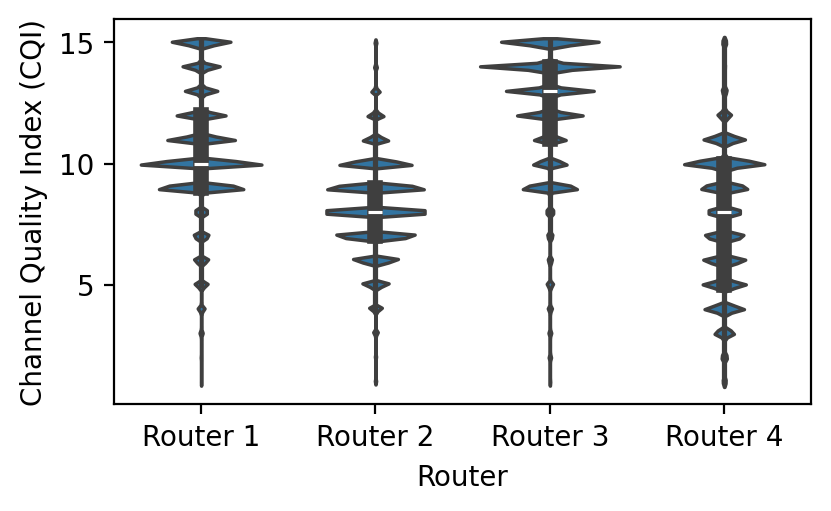

In [7]:
# Reset the index for each dataset before concatenation
df_D2_cleaned = df_D2[['lCqi']].reset_index(drop=True)
df_DTAG_cleaned = df_DTAG[['lCqi']].reset_index(drop=True)
df_8388_cleaned = df_8388[['lCqi']].reset_index(drop=True)
df_8395_cleaned = df_8395[['lCqi']].reset_index(drop=True)

# Combine the data into a single DataFrame
data_combined = pd.concat([
    df_D2_cleaned.assign(Category='Router 1'),
    df_DTAG_cleaned.assign(Category='Router 2'),
    df_8388_cleaned.assign(Category='Router 3'),
    df_8395_cleaned.assign(Category='Router 4')
], ignore_index=True)

# Create the violin plot
cqi_violin = plt.figure(figsize=(4.5, 2.5), dpi=200)
sns.violinplot(data=data_combined, x='Category', y='lCqi')  # Properly structured data
plt.ylabel('Channel Quality Index (CQI)')
plt.xlabel('Router')
plt.savefig(f'plots/routers-violinplot-cqi.pdf', bbox_inches='tight')
plt.show()

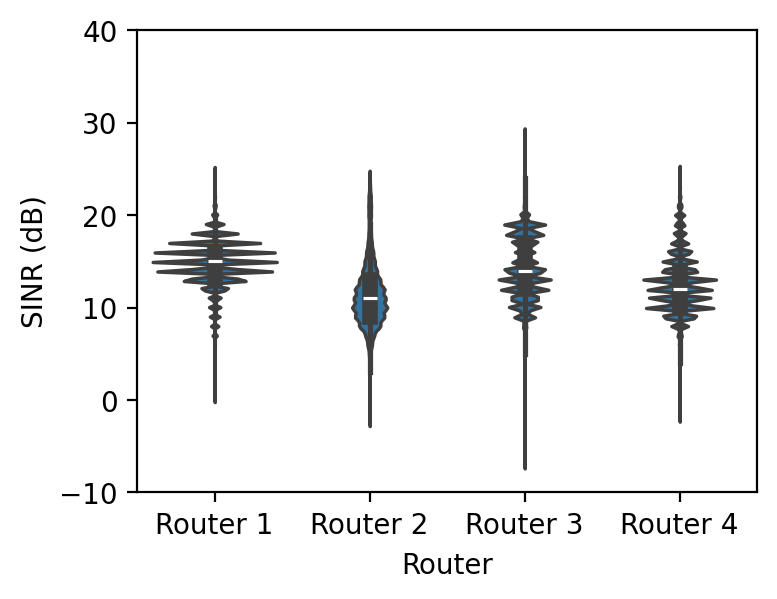

In [8]:
# Select LTE and clean up outliers
df_D2_lte = df_D2.query("`lDataClass` == 'LTE' & `lSinr` > -50")
df_DTAG_lte = df_DTAG.query("`lDataClass` == 'LTE' & `lSinr` > -50")
df_8388_lte = df_8388.query("`lDataClass` == 'LTE' & `lSinr` > -50")
df_8395_lte = df_8395.query("`lDataClass` == 'LTE' & `lSinr` > -50")

# Reset the index for each dataset before concatenation
df_D2_cleaned = df_D2_lte[['lSinr']].reset_index(drop=True)
df_DTAG_cleaned = df_DTAG_lte[['lSinr']].reset_index(drop=True)
df_8388_cleaned = df_8388_lte[['lSinr']].reset_index(drop=True)
df_8395_cleaned = df_8395_lte[['lSinr']].reset_index(drop=True)

# Combine the data into a single DataFrame
data_combined = pd.concat([
    df_D2_cleaned.assign(Category='Router 1'),
    df_DTAG_cleaned.assign(Category='Router 2'),
    df_8388_cleaned.assign(Category='Router 3'),
    df_8395_cleaned.assign(Category='Router 4')
], ignore_index=True)

# Create the violin plot
sinr_violin = plt.figure(figsize=(4, 3), dpi=200)
sns.violinplot(data=data_combined, x='Category', y='lSinr')  # Properly structured data
plt.xlabel('Router')
plt.ylabel('SINR (dB)')
plt.ylim(-10, 40)
plt.savefig(f'plots/routers-violinplot-sinr-lte.pdf', bbox_inches='tight')
plt.show()

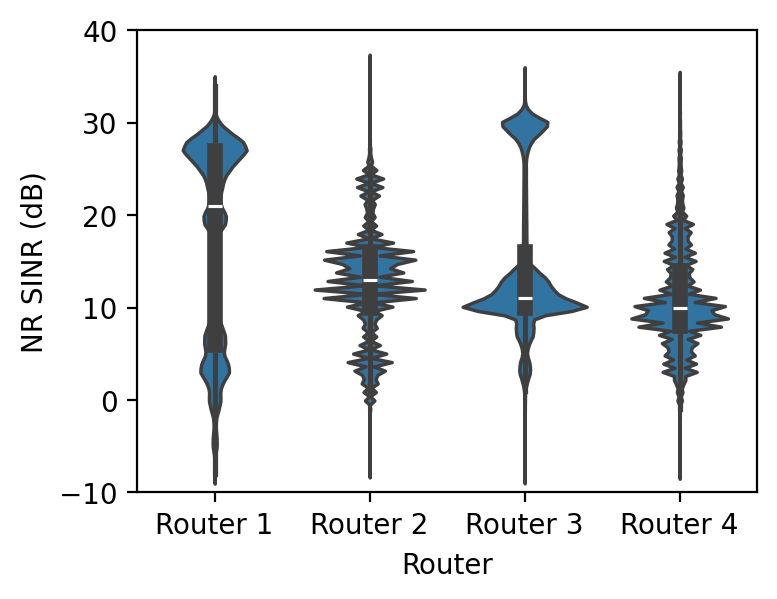

In [9]:
# Select 5G NSA and clean up outliers
df_D2_5g_nsa = df_D2.query("`lDataClass` == '5G NSA' & `lNrSinr` > -50")
df_DTAG_5g_nsa = df_DTAG.query("`lDataClass` == '5G NSA' & `lNrSinr` > -50")
df_8388_5g_nsa = df_8388.query("`lDataClass` == '5G NSA' & `lNrSinr` > -50")
df_8395_5g_nsa = df_8395.query("`lDataClass` == '5G NSA' & `lNrSinr` > -50")

# Reset the index for each dataset before concatenation
df_D2_cleaned = df_D2_5g_nsa[['lNrSinr']].reset_index(drop=True)
df_DTAG_cleaned = df_DTAG_5g_nsa[['lNrSinr']].reset_index(drop=True)
df_8388_cleaned = df_8388_5g_nsa[['lNrSinr']].reset_index(drop=True)
df_8395_cleaned = df_8395_5g_nsa[['lNrSinr']].reset_index(drop=True)

# Combine the data into a single DataFrame
data_combined = pd.concat([
    df_D2_cleaned.assign(Category='Router 1'),
    df_DTAG_cleaned.assign(Category='Router 2'),
    df_8388_cleaned.assign(Category='Router 3'),
    df_8395_cleaned.assign(Category='Router 4')
], ignore_index=True)

# Create the violin plot
nrsinr_violin = plt.figure(figsize=(4, 3), dpi=200)
sns.violinplot(data=data_combined, x='Category', y='lNrSinr')  # Properly structured data
plt.xlabel('Router')
plt.ylabel('NR SINR (dB)')
plt.ylim(-10, 40)
plt.xlabel('Router')
plt.savefig(f'plots/routers-violinplot-nrsinr-5g-nsa.pdf', bbox_inches='tight')
plt.show()

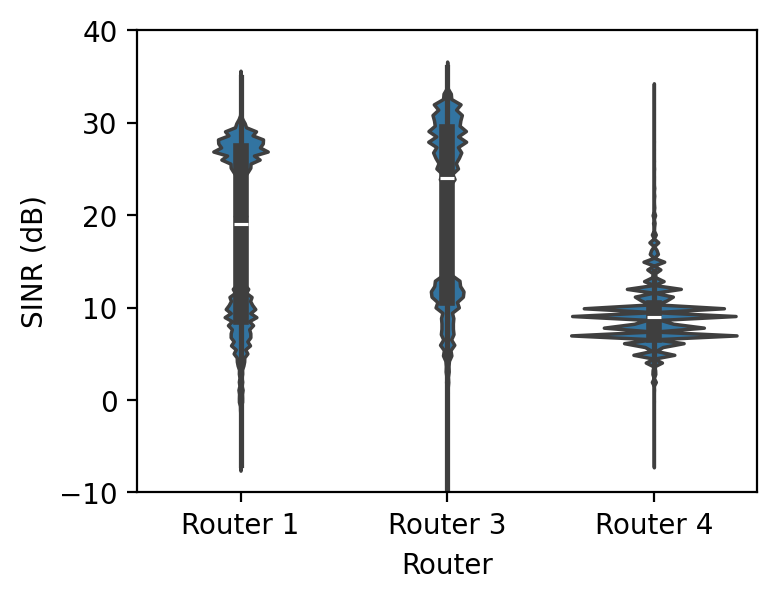

In [10]:
# Select 5G SA and clean up outliers
df_D2_5g_sa = df_D2.query("`lDataClass` == '5G SA' & `lSinr` > -50")
df_DTAG_5g_sa = df_DTAG.query("`lDataClass` == '5G SA' & `lSinr` > -50")
df_8388_5g_sa = df_8388.query("`lDataClass` == '5G SA' & `lSinr` > -50")
df_8395_5g_sa = df_8395.query("`lDataClass` == '5G SA' & `lSinr` > -50")

# Reset the index for each dataset before concatenation
df_D2_cleaned = df_D2_5g_sa[['lSinr']].reset_index(drop=True)
df_DTAG_cleaned = df_DTAG_5g_sa[['lSinr']].reset_index(drop=True)
df_8388_cleaned = df_8388_5g_sa[['lSinr']].reset_index(drop=True)
df_8395_cleaned = df_8395_5g_sa[['lSinr']].reset_index(drop=True)

# Combine the data into a single DataFrame
data_combined = pd.concat([
    df_D2_cleaned.assign(Category='Router 1'),
    df_DTAG_cleaned.assign(Category='Router 2'),
    df_8388_cleaned.assign(Category='Router 3'),
    df_8395_cleaned.assign(Category='Router 4')
], ignore_index=True)

# Create the violin plot
sinr_violin = plt.figure(figsize=(4, 3), dpi=200)
sns.violinplot(data=data_combined, x='Category', y='lSinr')  # Properly structured data
plt.xlabel('Router')
plt.ylabel('SINR (dB)')
plt.ylim(-10, 40)
plt.savefig(f'plots/routers-violinplot-sinr-5g-sa.pdf', bbox_inches='tight')
plt.show()

In [11]:
start_date = '2024-06-28 16:00:00'
end_date = '2024-06-28 20:30:00'

mask = (df_D2['timestamp_router'] > start_date) & (df_D2['timestamp_router'] <= end_date)
df_D2 = df_D2.loc[mask]

mask = (df_DTAG['timestamp_router'] > start_date) & (df_DTAG['timestamp_router'] <= end_date)
df_DTAG = df_DTAG.loc[mask]

mask = (df_8388['timestamp_router'] > start_date) & (df_8388['timestamp_router'] <= end_date)
df_8388 = df_8388.loc[mask]

<Axes: xlabel='timestamp_router'>

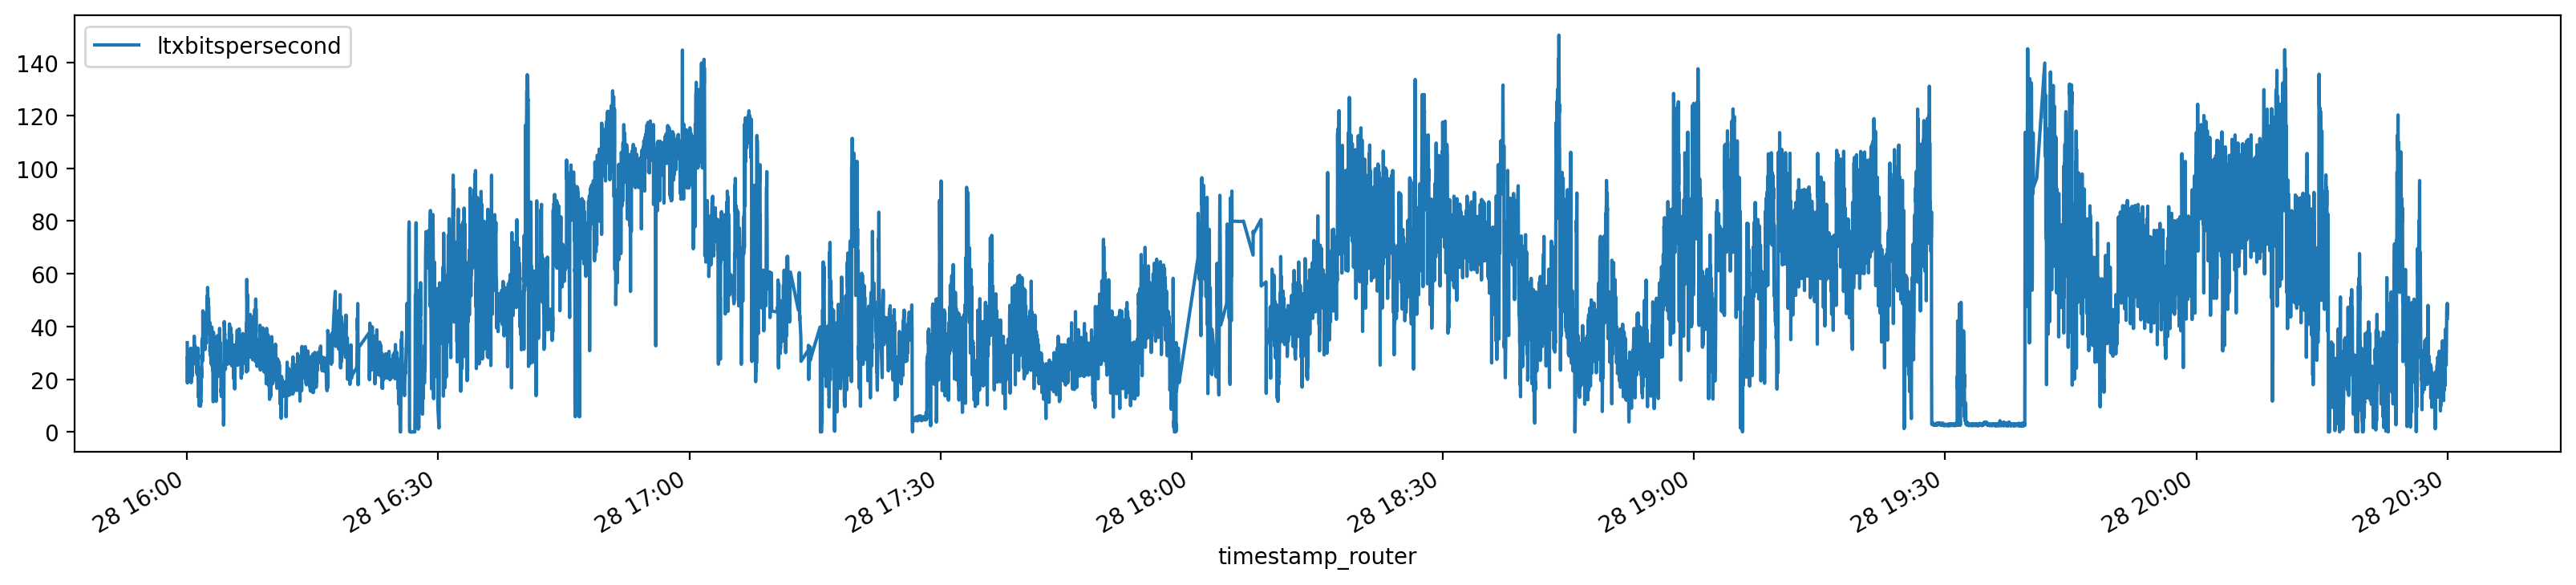

In [12]:
df_D2[['ltxbitspersecond']].div(1000*1000).plot(figsize=(20, 4))

<Axes: xlabel='timestamp_router'>

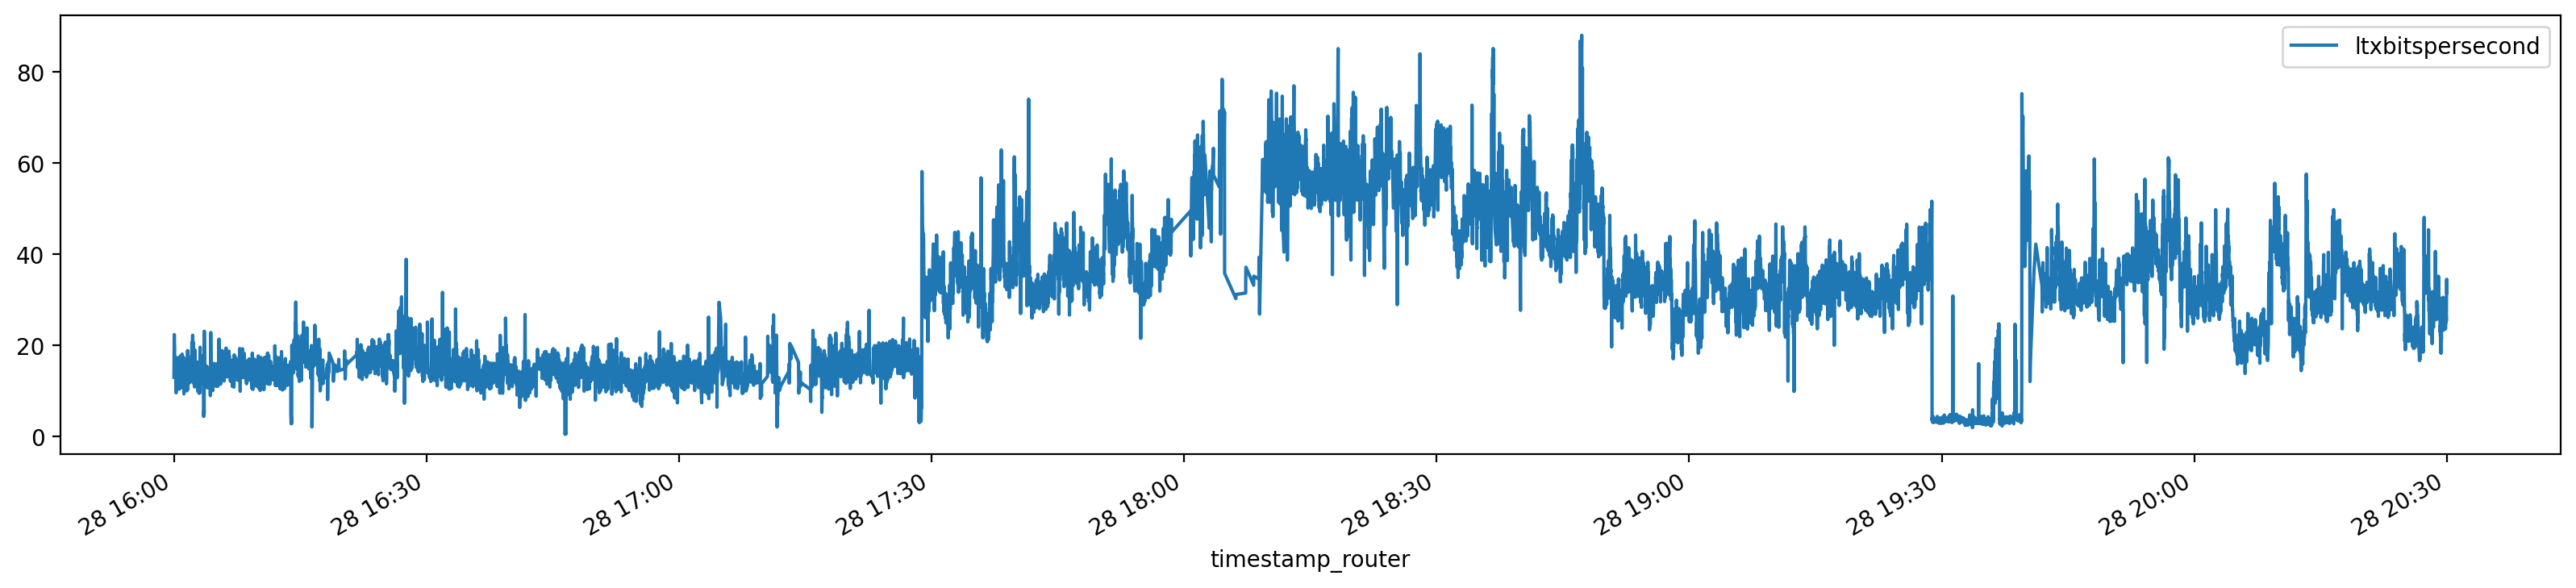

In [13]:
df_DTAG[['ltxbitspersecond']].div(1000*1000).plot(figsize=(20, 4))

<Axes: xlabel='timestamp_router'>

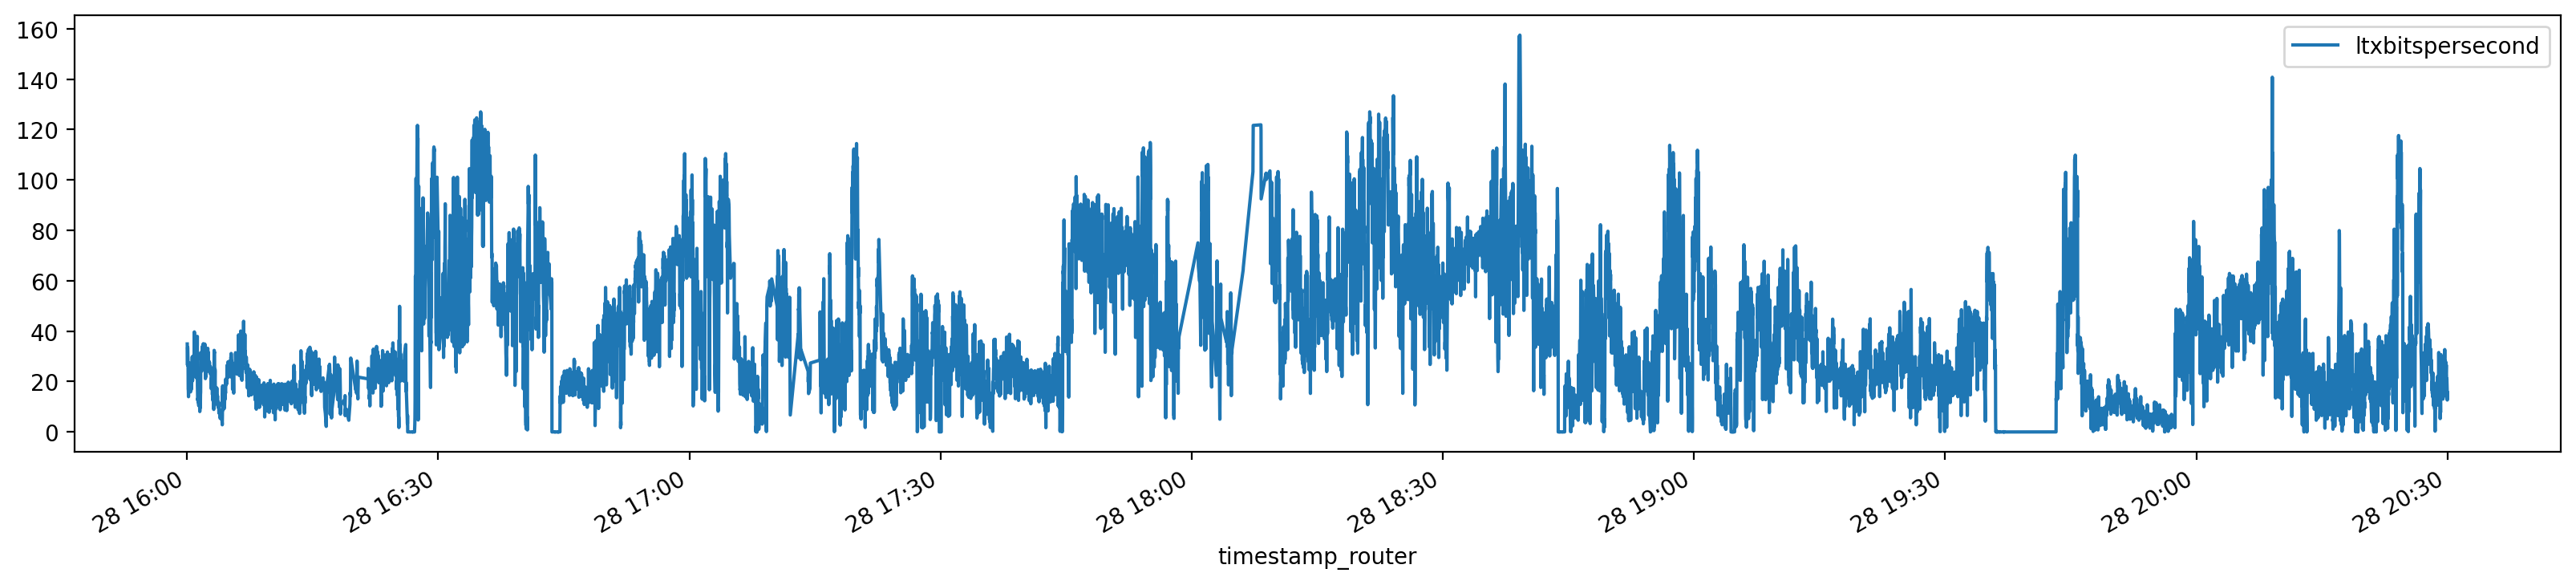

In [14]:
df_8388[['ltxbitspersecond']].div(1000*1000).plot(figsize=(20, 4))

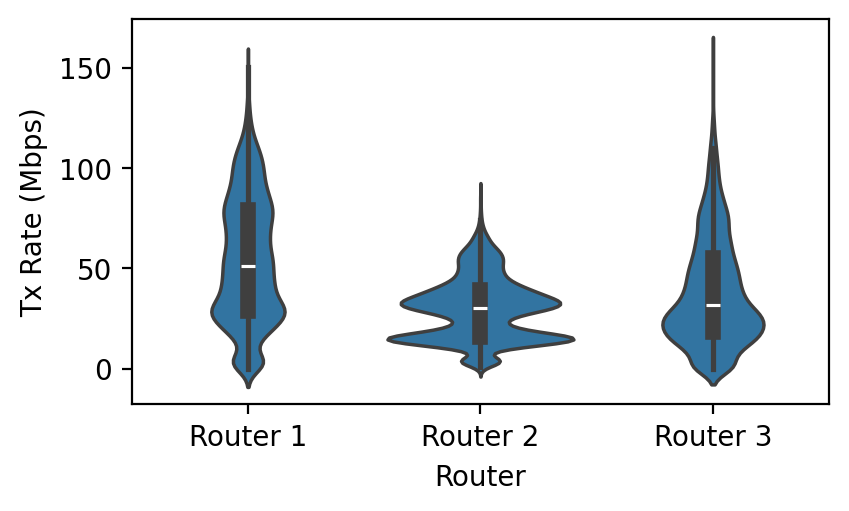

In [15]:
# Reset the index for each dataset before concatenation
df_D2_cleaned = df_D2[['ltxbitspersecond']].div(1000 * 1000).reset_index(drop=True)
df_DTAG_cleaned = df_DTAG[['ltxbitspersecond']].div(1000 * 1000).reset_index(drop=True)
df_8388_cleaned = df_8388[['ltxbitspersecond']].div(1000 * 1000).reset_index(drop=True)

# Combine the data into a single DataFrame
data_combined = pd.concat([
    df_D2_cleaned.assign(Category='Router 1'),
    df_DTAG_cleaned.assign(Category='Router 2'),
    df_8388_cleaned.assign(Category='Router 3'),
], ignore_index=True)

# Create the violin plot
txrate_violin = plt.figure(figsize=(4.5, 2.5), dpi=200)
sns.violinplot(data=data_combined, x='Category', y='ltxbitspersecond')  # Properly structured data
plt.ylabel('Tx Rate (Mbps)')
plt.xlabel('Router')
#plt.ylim(0, 175)
plt.savefig(f'plots/routers-txbitspersecond-kiwo-from-16-00-to-20-30.pdf', bbox_inches='tight')
plt.show()